In [1]:
from data_loader import read_tif, replace_invalid_and_crop, TFDatasetBuilder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/training_data_S2/image_metadata.csv')

In [3]:
df.shape

(12292, 7)

In [4]:
df = df[df['market'] == 1]
df

,image_file_path,market_days,market,min_value,max_value,std_dev,country
0,training_data_S2/images/lon-0_0107lat37_6608_0...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,4.090491,NaN,Kenya
1,training_data_S2/images/lon-0_0107lat37_6608_1...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,5.272071,NaN,Kenya
2,training_data_S2/images/lon-0_0195lat35_9627_0...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,9.794985,NaN,Kenya
3,training_data_S2/images/lon-0_0195lat35_9627_1...,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,9.794985,NaN,Kenya
4,training_data_S2/images/lon-0_0246lat34_746_0.tif,"[0, 0, 0, 1, 0, 0, 1]",1,-inf,3.320477,NaN,Kenya
...,...,...,...,...,...,...,...
3139,training_data_S2/images/lon32_9298lat2_3194_1.tif,"[1, 0, 0, 0, 0, 0, 0]",1,-1.289689,49.669113,1.046062,Uganda
3140,training_data_S2/images/lon32_9307lat2_6035_0.tif,"[0, 0, 1, 0, 0, 0, 0]",1,-inf,4.725111,NaN,Uganda
3141,training_data_S2/images/lon32_9307lat2_6035_1.tif,"[0, 0, 1, 0, 0, 0, 0]",1,-3.395823,4.725111,0.249345,Uganda
3142,training_data_S2/images/lon32_9346lat2_4866_0.tif,"[0, 0, 0, 0, 0, 0, 1]",1,-7.064735,3.073965,0.301001,Uganda


In [14]:
arr = read_tif(df.iloc[0,0])
arr = replace_invalid_and_crop(arr, 128)
print(arr.shape)

(7, 128, 128)


In [20]:
row

image_file_path    training_data_S2/images/lon-0_0107lat37_6608_0...
market_days                                    [0, 0, 1, 0, 0, 0, 0]
market                                                             1
min_value                                                       -inf
max_value                                                   4.090491
std_dev                                                          NaN
country                                                        Kenya
Name: 0, dtype: object

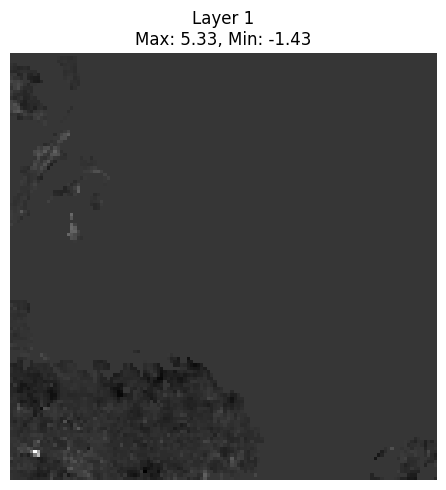

In [46]:
row = df.iloc[10,:]

arr = replace_invalid_and_crop(read_tif(row['image_file_path']))
day_vec = np.array(eval(row['market_days']))
filtered_arr = arr[day_vec == 1]
num_layers = filtered_arr.shape[0]
fig, axes = plt.subplots(1, num_layers, figsize=(15, 5))

if num_layers == 1:
    axes = [axes]

for i in range(num_layers):
    ax = axes[i]
    ax.imshow(filtered_arr[i], cmap='gray')
    ax.set_title(f'Layer {i+1}\nMax: {filtered_arr[i].max():.2f}, Min: {filtered_arr[i].min():.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

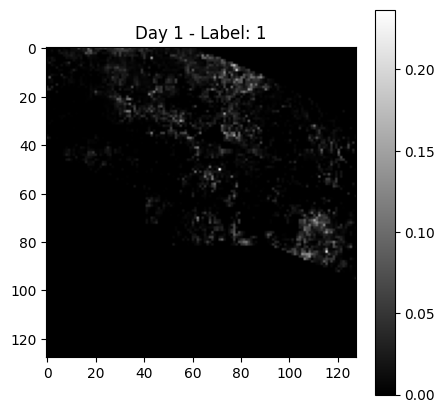

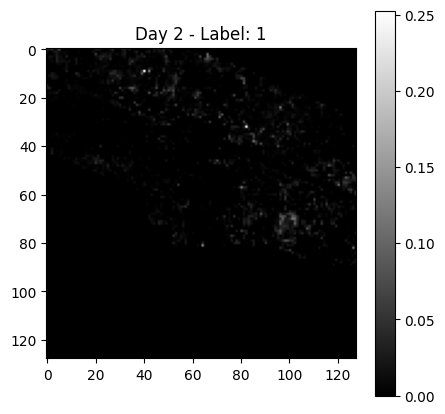

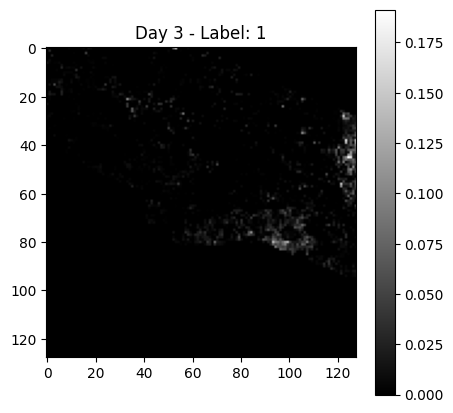

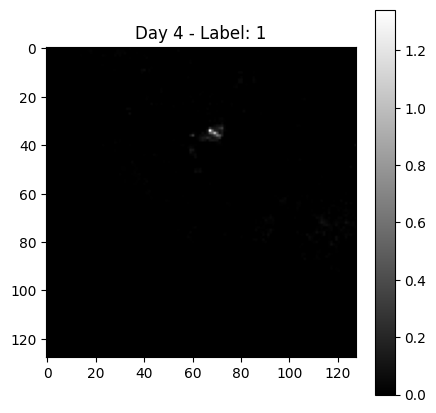

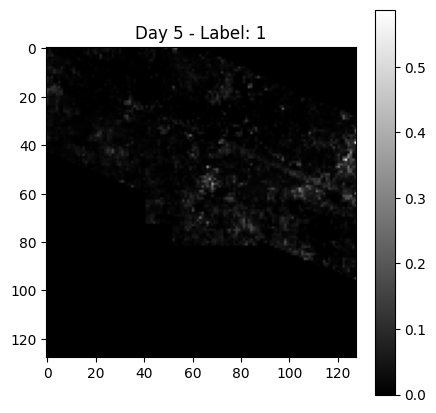

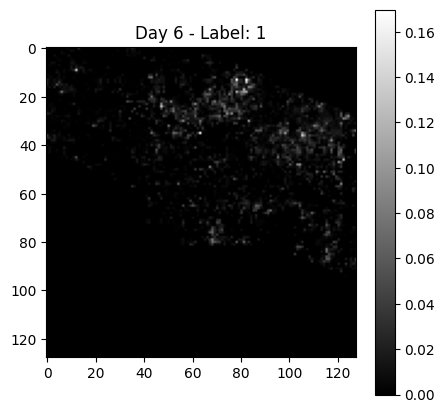

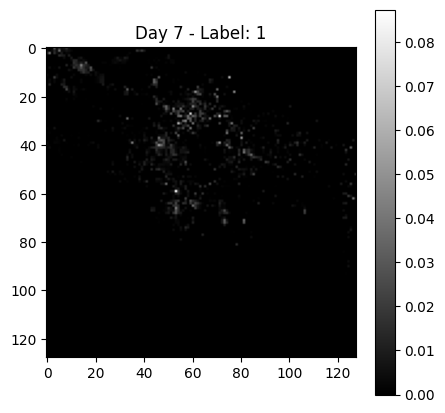

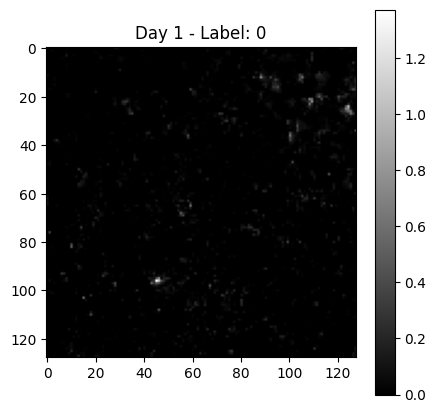

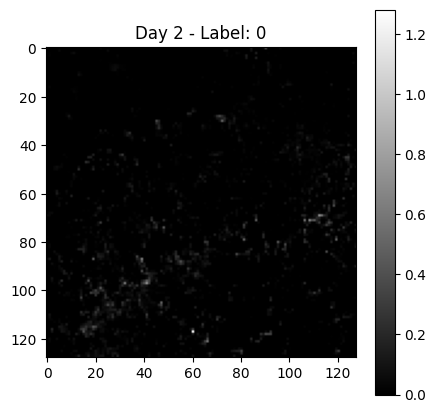

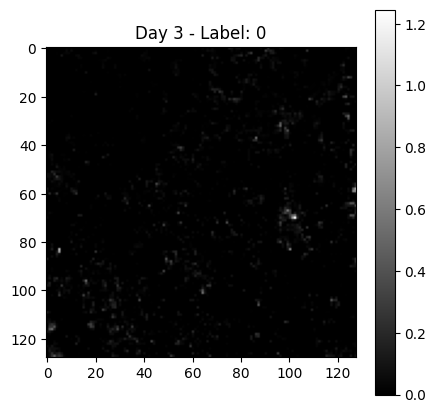

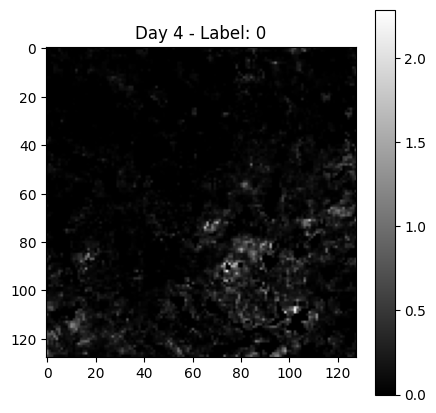

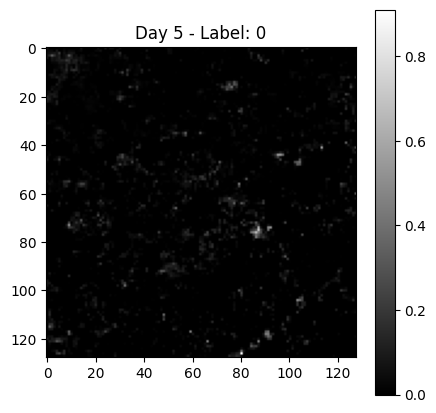

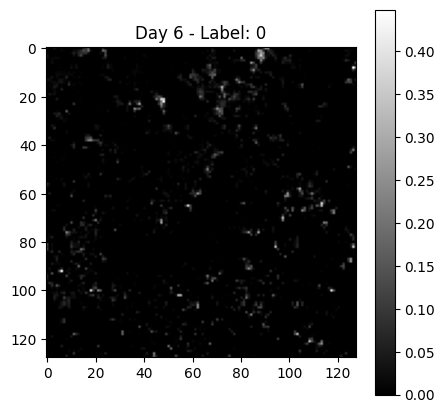

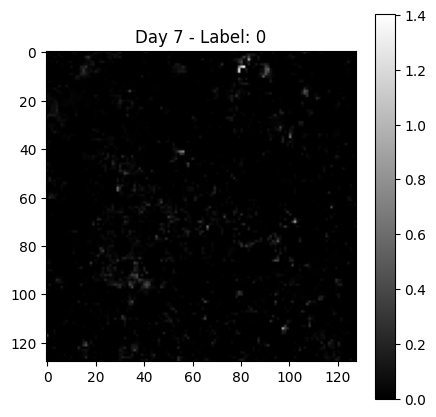

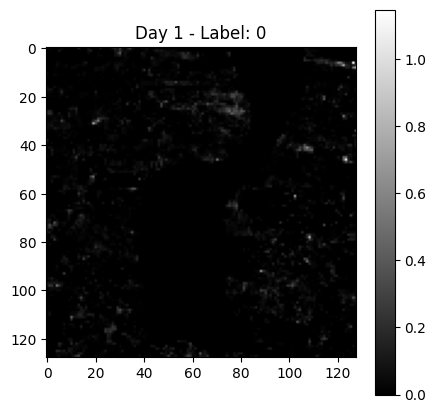

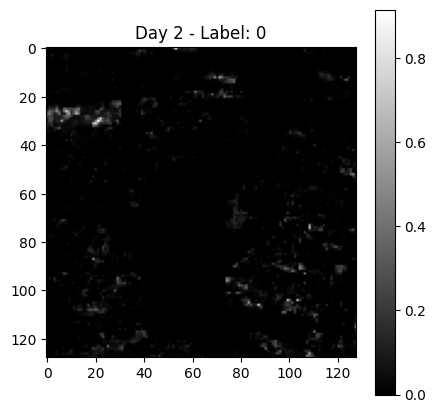

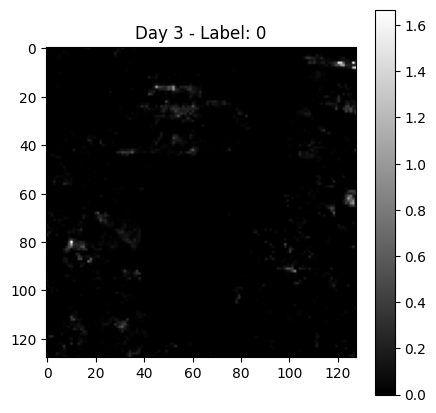

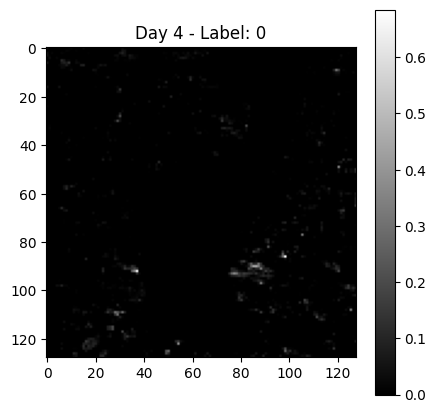

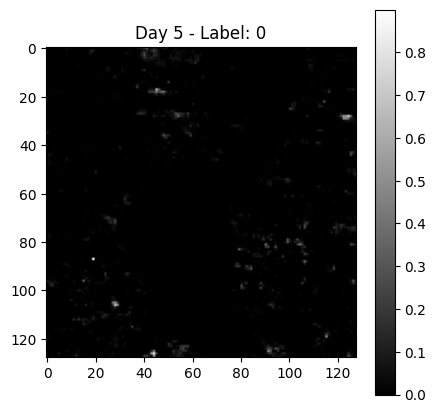

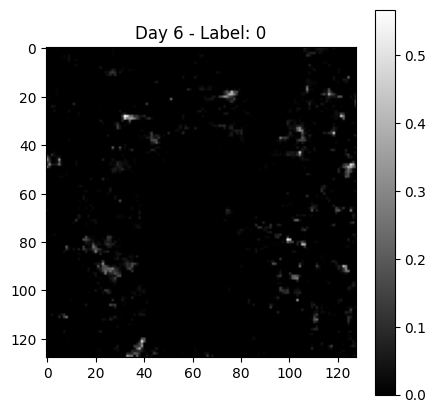

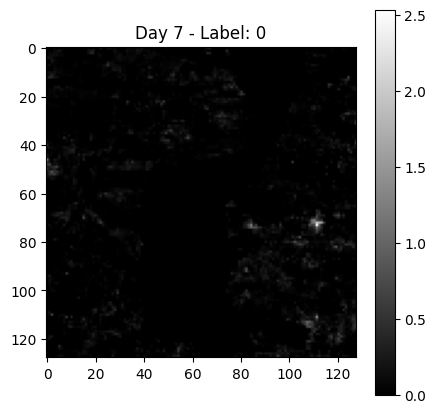

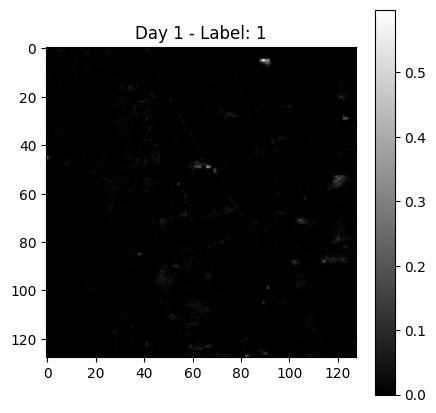

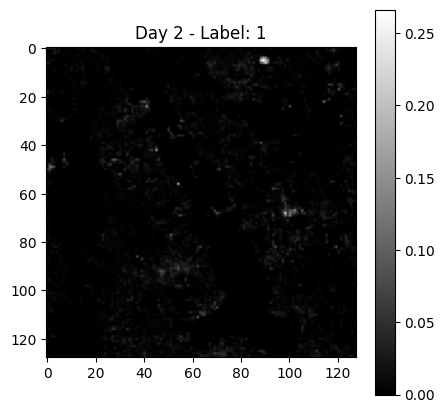

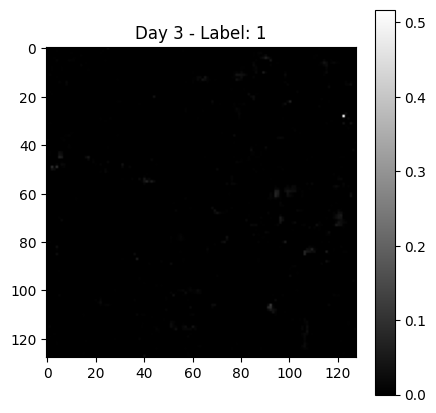

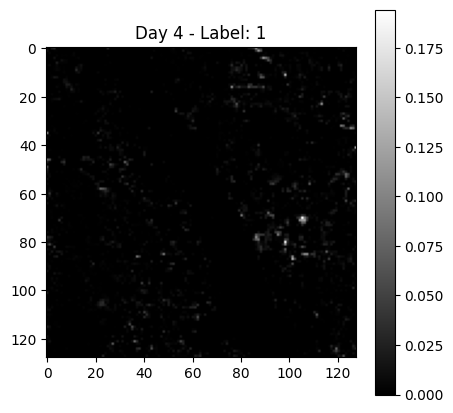

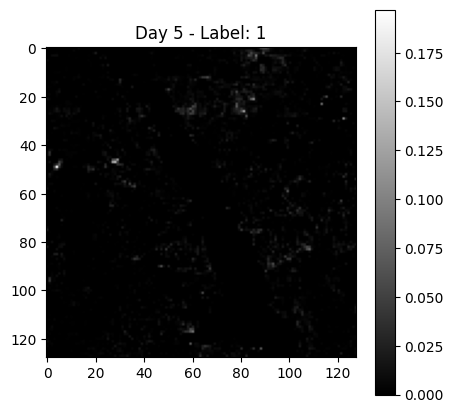

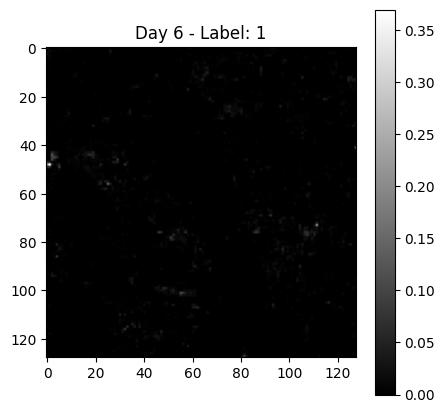

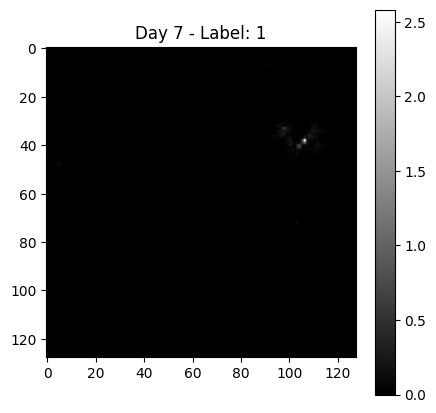

2025-01-23 17:34:24.545145: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
builder = TFDatasetBuilder(scaling='minmax')

# Build datasets
train_ds, _, _ = builder.build_datasets(
    train_split=0.70,
    val_split=0.15,
    sample_size=100,
    batch_size=32,
)

# Retrieve one batch from the train dataset
# For demonstration, we'll just take one iteration
for images, labels in train_ds.take(4):
    for j in range(7):
        plt.figure(figsize=(5, 5))
        plt.imshow(images[0, j, :, :, 0], cmap='gray')
        plt.title(f'Day {j+1} - Label: {labels[0].numpy()}')
        plt.colorbar()
        plt.show()


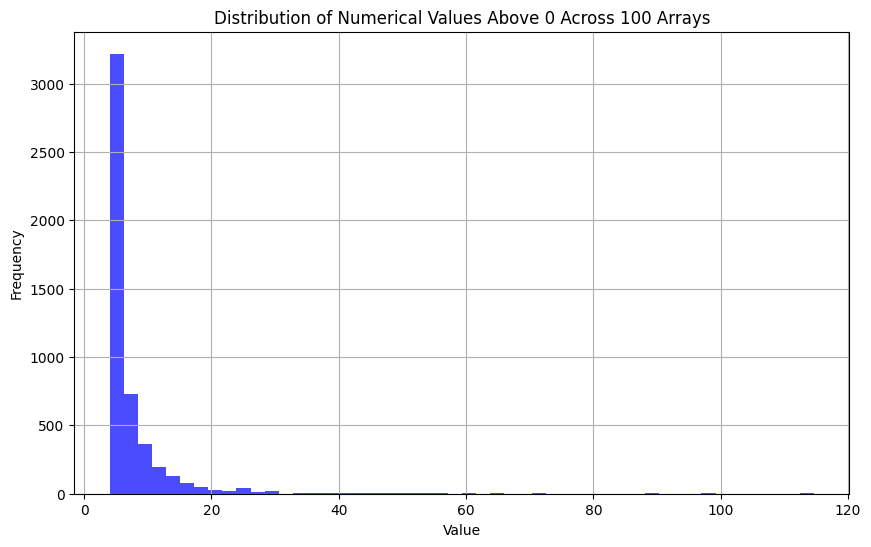

In [41]:
arrays = []
for idx in range(100):
    image_path = df.iloc[idx]['image_file_path']
    arr = read_tif(image_path)
    arr = replace_invalid_and_crop(arr, 128)  # Ensure all arrays have the same shape
    arrays.append(arr)

# Convert the list of arrays to a single numpy array
arrays_np = np.array(arrays)

# Flatten the array to get all numerical values
flattened_values = arrays_np.flatten()

# Filter values to only include those above 0
filtered_values = flattened_values[flattened_values > 4]

# Plot the distribution of numerical values above 0
plt.figure(figsize=(10, 6))
plt.hist(filtered_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Numerical Values Above 0 Across 100 Arrays')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
day_slice = images_np[idx_in_batch, day_index, :, :, 0]
label_vec = labels_np[idx_in_batch]  # shape (8,)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(day_slice, cmap='gray', vmin=lower, vmax=upper)
plt.title(f"Day {day_index} slice, label={label_vec}")
plt.colorbar()
plt.show()

In [1]:
example_filelist = ['481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180814_105102_0e2f_3B_AnalyticMS_SR_harmonized',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180816_105003_0e19_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180817_105329_1006_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180817_111416_0f4d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180823_105303_1008_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180823_105304_1008_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180825_105355_1042_3B_AnalyticMS_SR_harmonized',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180825_111312_0f40_3B_AnalyticMS_SR_harmonized',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180907_105359_102e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180912_111055_0f2d_3B_AnalyticMS_SR_harmonized',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180915_105400_101e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180916_104956_0e0e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180916_104957_0e0e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180923_105407_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180923_105408_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180927_105421_1005_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180927_105422_1005_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181003_105446_103c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181004_105427_1014_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181004_110737_1053_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181007_105559_0f34_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181010_110618_100d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181012_105125_0e2f_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181012_110621_0f24_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181013_105454_100c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181013_105455_100c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181013_110530_0f21_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181014_105056_0e19_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181017_105211_0e0f_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181018_105534_1005_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181018_110522_0f2b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181021_110419_100d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181023_110455_0f2a_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181024_105428_103a_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181024_105429_103a_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181026_105412_1001_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181029_105601_0f42_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181030_105424_0f35_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181031_110327_104b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181103_105522_100c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181105_110234_0f4d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181105_110235_0f4d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181106_105637_0f51_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181109_105551_1044_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181109_110213_0f49_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181110_105535_103b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181110_105536_103b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181111_105614_1008_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181112_105223_0e20_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181121_110025_0f33_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181122_105756_0f52_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181122_105757_0f52_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181125_105616_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181128_105849_0f4b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181201_105813_100d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181202_105555_1032_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181202_105556_1032_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181206_105817_1053_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181207_105557_102c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181207_105558_102c_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181208_105720_1042_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181208_105750_1020_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181209_105715_0f2b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181209_105716_0f2b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181210_105716_0f12_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181210_105758_1054_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181211_105616_1029_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181212_105636_1012_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181213_105627_0f52_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181215_105631_0f35_3B_AnalyticMS_SR_harmonized',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181216_105621_104d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181216_105622_104d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181217_105559_1004_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181218_105640_0f44_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181218_105727_0f31_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181219_105615_1009_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181219_105616_1009_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181222_105722_0f28_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181224_105655_1024_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181226_105502_0f32_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181229_105627_1038_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181230_105404_1_104b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190102_105649_1011_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190103_105806_1018_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190105_105335_0f2d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190105_105648_1003_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190106_105750_1012_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190109_105733_0f35_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190113_105655_1009_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190115_105222_1020_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190115_105832_1006_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190116_105210_0f2b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190116_105843_0f28_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190117_105326_0e0f_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190118_105714_1024_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190119_105715_103d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190120_105723_103b_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190121_105102_1050_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190125_104959_0f44_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190125_105540_1014_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190125_105941_0f22_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190127_105650_1011_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20190128_105102_0f3d_3B_AnalyticMS_SR_harmonized_coreg']

In [9]:
from datetime import datetime

def extract_weekday(file_path):
    date_string = file_path.split('/')[-1][0:8]
    date_obj = datetime.strptime(date_string, '%Y%m%d')
    return (date_obj.weekday() + 1) % 7

extract_weekday(example_filelist[0])

2

In [11]:
desired_weekdays = [0]
filtered_filelist = [file for file in example_filelist if extract_weekday(file) in desired_weekdays]
filtered_filelist

['481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180916_104956_0e0e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180916_104957_0e0e_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180923_105407_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20180923_105408_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181007_105559_0f34_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181014_105056_0e19_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181021_110419_100d_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181111_105614_1008_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181125_105616_1039_3B_AnalyticMS_SR_harmonized_coreg',
 '481725a2-3fc5-49d0-b1c3-c1a532ff7755/PSScene/20181202_105555_1

In [ ]:
import random

# Ensure the sample size does not exceed the length of filtered_filelist
sample_size = min(2000, len(filtered_filelist))
sampled_files = random.sample(filtered_filelist, sample_size)
sampled_files

ValueError: Sample larger than population or is negative